# Assignment 3


Fakhrurrozi (PYTN-KS14-018)

## **Import Function**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import confusion_matrix


## **Read Dataset**

In [2]:
df = pd.read_csv('bank-additional-full.csv', delimiter=';')

### **Data**

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Jumlah Duplikasi Data

In [7]:
df.duplicated().sum()

12

Jumlah Missing Values

In [8]:
df.isnull().sum().sum()

0

# Data Cleansing

In [9]:
df_clean = df.drop(['campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], axis=1)

In [10]:
df_clean.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'y'],
      dtype='object')

In [11]:
df_clean.info

<bound method DataFrame.info of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mo

# mengecek missing value

In [12]:
df_clean.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
y              0
dtype: int64

In [13]:
df_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,no


In [14]:
# df_clean.job.replace({'unknown': 0, 'admin.': 1,'blue-collar': 2,'entrepreneur': 3,'housemaid': 4,'management': 5,'retired': 6,'self-employed': 7,'services': 8,'student': 9,'technician': 10,'unemployed': 11}, inplace=True)
# df_clean.marital.replace({'unknown': 0, 'divorced': 1,'married': 2,'single': 3}, inplace=True)
# df_clean.education.replace({'unknown': 0, 'basic.4y': 1,'basic.6y': 2,'basic.9y': 3,'high.school': 4,'illiterate': 5,'professional.course': 6,'university.degree': 7}, inplace=True)
# df_clean.default.replace({'unknown': 0, 'no': 0, 'yes': 1}, inplace=True)
# df_clean.housing.replace({'unknown': 0, 'no': 0, 'yes': 1}, inplace=True)
# df_clean.loan.replace({'unknown': 0, 'no': 0, 'yes': 1}, inplace=True)
# df_clean.contact.replace({'cellular': 1,'telephone': 2}, inplace=True)
# df_clean.month.replace({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}, inplace=True)
# df_clean.day_of_week.replace({'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}, inplace=True)
# df_clean.y.replace({'no': 0, 'yes': 1}, inplace=True)

# mengubah string menjadi angka

In [15]:
def replace_values(df):
    df.replace({
        'job': {'unknown': 0, 'admin.': 1, 'blue-collar': 2, 'entrepreneur': 3, 'housemaid': 4, 'management': 5,
                'retired': 6, 'self-employed': 7, 'services': 8, 'student': 9, 'technician': 10, 'unemployed': 11},
        'marital': {'unknown': 0, 'divorced': 1, 'married': 2, 'single': 3},
        'education': {'unknown': 0, 'basic.4y': 1, 'basic.6y': 2, 'basic.9y': 3, 'high.school': 4, 'illiterate': 5,
                      'professional.course': 6, 'university.degree': 7},
        'default': {'unknown': 0, 'no': 0, 'yes': 1},
        'housing': {'unknown': 0, 'no': 0, 'yes': 1},
        'loan': {'unknown': 0, 'no': 0, 'yes': 1},
        'contact': {'cellular': 1, 'telephone': 2},
        'month': {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10,
                  'nov': 11, 'dec': 12},
        'day_of_week': {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5},
        'y': {'no': 0, 'yes': 1}
    }, inplace=True)

replace_values(df_clean)

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          41188 non-null  int64
 1   job          41188 non-null  int64
 2   marital      41188 non-null  int64
 3   education    41188 non-null  int64
 4   default      41188 non-null  int64
 5   housing      41188 non-null  int64
 6   loan         41188 non-null  int64
 7   contact      41188 non-null  int64
 8   month        41188 non-null  int64
 9   day_of_week  41188 non-null  int64
 10  duration     41188 non-null  int64
 11  y            41188 non-null  int64
dtypes: int64(12)
memory usage: 3.8 MB


In [17]:
df_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,y
0,56,4,2,1,0,0,0,2,5,1,261,0
1,57,8,2,4,0,0,0,2,5,1,149,0
2,37,8,2,4,0,1,0,2,5,1,226,0
3,40,1,2,2,0,0,0,2,5,1,151,0
4,56,8,2,4,0,0,1,2,5,1,307,0


# Visualisasi Data

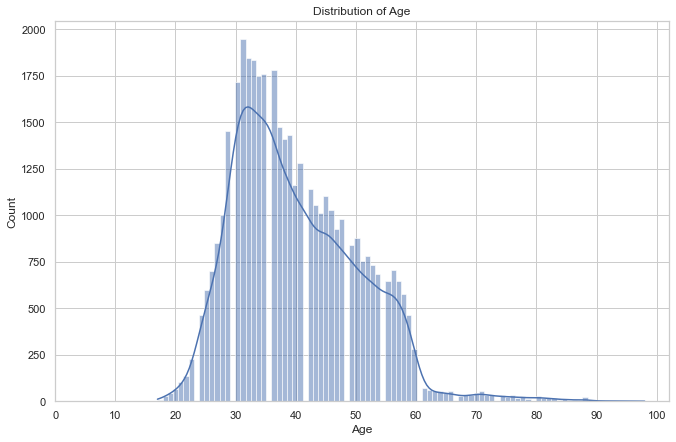

In [18]:
# Set style
sns.set(style="whitegrid")

# Set figure size
plt.figure(figsize=(11, 7))

# Plot histogram with KDE
sns.histplot(data=df, x="age", kde=True)

# Set title and labels
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")

# Customize tick labels
plt.xticks(range(0, 101, 10))  # Customize x-axis tick labels

# Show plot
plt.show()


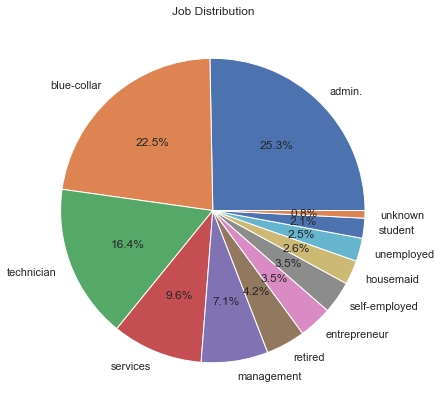

In [19]:
#Visualisasi distribusi usia menggunakan Pie Chart
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2d6d6']
job_counts = df['job'].value_counts()
plt.figure(figsize=(11, 7))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%')
plt.title('Job Distribution')
plt.show()

# Menentukan feature (x) dan target (y).

In [20]:
x = df_clean[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration']]
y = df_clean['y']

In [21]:
x.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration
0,56,4,2,1,0,0,0,2,5,1,261
1,57,8,2,4,0,0,0,2,5,1,149
2,37,8,2,4,0,1,0,2,5,1,226
3,40,1,2,2,0,0,0,2,5,1,151
4,56,8,2,4,0,0,1,2,5,1,307


In [22]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

### split dataset

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [24]:
print("Jumlah Original Berlangganan Deposit : ", len(y[y == 1]))
print("Jumlah Original Tidak Berlangganan Deposit : ", len(y[y == 0]))

print("Training True : ", len(y_train[y_train == 1]))
print("Training False : ", len(y_train[y_train == 0]))

print("Testing True : ", len(y_test[y_test == 1]))
print("Testing False : ", len(y_test[y_test == 0]))

Jumlah Original Berlangganan Deposit :  4640
Jumlah Original Tidak Berlangganan Deposit :  36548
Training True :  3731
Training False :  29219
Testing True :  909
Testing False :  7329


### membuat Model dan percobaan

#### Logistic Regression

In [25]:
# create a Logistic Regression
lr_model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)

# train the model using the training sets
lr_model.fit(x_train, y_train)

# predict the response for test dataset
lr_pred = lr_model.predict(x_test)

In [26]:
lr_model.score(x_train, y_train)

0.894567526555387

In [27]:
lr_model.score(x_test, y_test)

0.8931779558145181

In [28]:
def print_evaluation_metrics(y_true, y_pred):
    accuracy = metrics.accuracy_score(y_true, y_pred)
    confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
    classification_report = metrics.classification_report(y_true, y_pred)
    recall_score = metrics.recall_score(y_true, y_pred)

    print("Accuracy: {0:.4f}".format(accuracy))
    print("Confusion Matrix:")
    print(confusion_matrix)
    print("")
    print("Classification Report:")
    print(classification_report)
    print("Recall Score:", recall_score)

In [29]:
print_evaluation_metrics(y_test, lr_pred)


Accuracy: 0.8932
Confusion Matrix:
[[7199  130]
 [ 750  159]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7329
           1       0.55      0.17      0.27       909

    accuracy                           0.89      8238
   macro avg       0.73      0.58      0.60      8238
weighted avg       0.87      0.89      0.87      8238

Recall Score: 0.17491749174917492


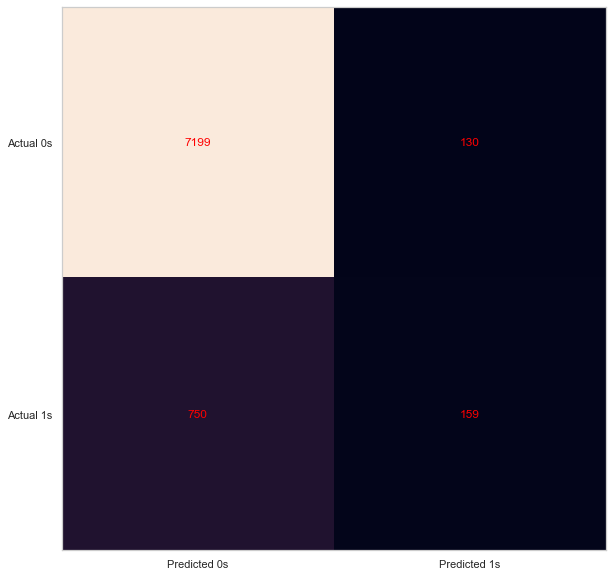

In [30]:
cm = metrics.confusion_matrix(y_test, lr_pred)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

### K-Nearest Neighbor

In [31]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)

In [32]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, knn_pred)))
print(metrics.confusion_matrix(y_test, knn_pred))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, knn_pred))

Accuracy: 0.8841
[[7077  252]
 [ 703  206]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7329
           1       0.45      0.23      0.30       909

    accuracy                           0.88      8238
   macro avg       0.68      0.60      0.62      8238
weighted avg       0.86      0.88      0.87      8238



### Naive bayes

In [33]:
# create a Naive Bayes
NB = GaussianNB()

# train the model using the training sets
NB.fit(x_train, y_train)

# predict the response for test dataset
NB_pred = NB.predict(x_test)

In [34]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, NB_pred)))
print(metrics.confusion_matrix(y_test, NB_pred))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, NB_pred))
print(metrics.recall_score(y_test, NB_pred))

Accuracy: 0.8884
[[7015  314]
 [ 605  304]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7329
           1       0.49      0.33      0.40       909

    accuracy                           0.89      8238
   macro avg       0.71      0.65      0.67      8238
weighted avg       0.87      0.89      0.88      8238

0.33443344334433445


### Random Forest

In [35]:
# create a Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# train the model using the training sets
rf_model.fit(x_train, y_train.ravel())

# predict the response for test dataset
rf_pred = rf_model.predict(x_test)

In [36]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_pred)))
print(metrics.confusion_matrix(y_test, rf_pred))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, rf_pred))
print(metrics.recall_score(y_test, rf_pred))

Accuracy: 0.8965
[[7081  248]
 [ 605  304]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7329
           1       0.55      0.33      0.42       909

    accuracy                           0.90      8238
   macro avg       0.74      0.65      0.68      8238
weighted avg       0.88      0.90      0.89      8238

0.33443344334433445


### Decision Tree

In [37]:
# create a Decision Tree
dt_model = DecisionTreeClassifier()

# train the model using the training sets
dt_model = dt_model.fit(x_train, y_train)

# predict the response for test dataset
dt_pred = dt_model.predict(x_test)

In [38]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, dt_pred)))
print(metrics.confusion_matrix(y_test, dt_pred))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, dt_pred))
print(metrics.recall_score(y_test, dt_pred))

Accuracy: 0.8636
[[6727  602]
 [ 522  387]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      7329
           1       0.39      0.43      0.41       909

    accuracy                           0.86      8238
   macro avg       0.66      0.67      0.67      8238
weighted avg       0.87      0.86      0.87      8238

0.42574257425742573


### SVM

In [39]:
# create a Support Vector Machine
svm_model = svm.SVC()

# train the model using the training sets
svm_model.fit(x_train, y_train)

# predict the response for test dataset
svm_pred = svm_model.predict(x_test)

In [40]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, svm_pred)))
print(metrics.confusion_matrix(y_test, svm_pred))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, svm_pred))

Accuracy: 0.8926
[[7190  139]
 [ 746  163]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7329
           1       0.54      0.18      0.27       909

    accuracy                           0.89      8238
   macro avg       0.72      0.58      0.61      8238
weighted avg       0.87      0.89      0.87      8238



### Akurasi skor semua model

In [41]:
print("Logistic Regression: ", metrics.accuracy_score(y_test, lr_pred))
print("K-Nearest Neighbors: ", metrics.accuracy_score(y_test, knn_pred))
print("Support Vector Machine: ", metrics.accuracy_score(y_test, svm_pred))
print("Decision Tree: ", metrics.accuracy_score(y_test, dt_pred))
print("Random Forest: ", metrics.accuracy_score(y_test, rf_pred))
print("Naive Bayes: ", metrics.accuracy_score(y_test, NB_pred))

Logistic Regression:  0.8931779558145181
K-Nearest Neighbors:  0.8840738043214372
Support Vector Machine:  0.892571012381646
Decision Tree:  0.8635591162903618
Random Forest:  0.8964554503520272
Naive Bayes:  0.888443797038116


### Meningkatkan Performanya

In [42]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_pred)))
print(metrics.confusion_matrix(y_test, lr_pred))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_pred))
print(metrics.recall_score(y_test, lr_pred))

Accuracy: 0.8932
[[7199  130]
 [ 750  159]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7329
           1       0.55      0.17      0.27       909

    accuracy                           0.89      8238
   macro avg       0.73      0.58      0.60      8238
weighted avg       0.87      0.89      0.87      8238

0.17491749174917492


bisa dilihat diatas nilai recall sangat berbeda jauh. Hal ini disebabkan karena jumlah klien berlangganan deposit dan tidak berlangganan deposit tidak seimbang. 

In [43]:
print("Jumlah Berlangganan Deposit : ", len(y[y == 1]))
print("Jumlah Tidak Berlangganan Deposit : ", len(y[y == 0]))

Jumlah Berlangganan Deposit :  4640
Jumlah Tidak Berlangganan Deposit :  36548


1st max value of 0.713 occured at C=0.100
1st max value of 0.713 occured at C=0.100
1st max value of 0.713 occured at C=0.100
1st max value of 0.713 occured at C=0.100
1st max value of 0.713 occured at C=0.100
1st max value of 0.713 occured at C=0.100
1st max value of 0.713 occured at C=0.100
1st max value of 0.713 occured at C=0.100
1st max value of 0.713 occured at C=0.100
1st max value of 0.713 occured at C=0.100
1st max value of 0.713 occured at C=0.100
1st max value of 0.713 occured at C=0.100
1st max value of 0.713 occured at C=0.100
1st max value of 0.713 occured at C=0.100
1st max value of 0.713 occured at C=0.100
1st max value of 0.713 occured at C=0.100
1st max value of 0.713 occured at C=0.100
1st max value of 0.713 occured at C=0.100
1st max value of 0.713 occured at C=0.100
1st max value of 0.713 occured at C=0.100
1st max value of 0.713 occured at C=0.100
1st max value of 0.713 occured at C=0.100
1st max value of 0.713 occured at C=0.100
1st max value of 0.713 occured at 

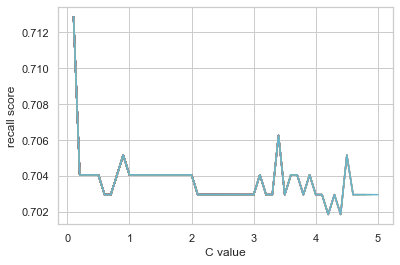

In [44]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42, solver='liblinear', max_iter=10000)
    lr_model_loop.fit(x_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(x_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test

    C_val = C_val + C_inc

    best_score_C_val = C_values[recall_scores.index(best_recall_score)]
    print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score,best_score_C_val))

    plt.plot(C_values, recall_scores, "-")
    plt.xlabel("C value")
    plt.ylabel("recall score")

In [45]:
lr_model = LogisticRegression(class_weight="balanced", C=best_score_C_val, random_state=42, solver='liblinear')
lr_model.fit(x_train, y_train.ravel())
lr_predict_test = lr_model.predict(x_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test))
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.8029
[[5966 1363]
 [ 261  648]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      7329
           1       0.32      0.71      0.44       909

    accuracy                           0.80      8238
   macro avg       0.64      0.76      0.66      8238
weighted avg       0.89      0.80      0.83      8238

0.7128712871287128


Sekarang bisa kita lihat nilai recall sudah diatas 70% semua karna yang berlangganan dan tidak berlangganan sudah sama